<h1 style = "color : Brown">CLUSTTERING ASSIGNMENT</h1>

### I. Importing and Understanding the data

In [101]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [102]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for Scaling
from sklearn.preprocessing import StandardScaler

# for KMeans Clustering
from sklearn.cluster import KMeans

# for Hierarchial Clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [103]:
#reading countries_dataset
countries_data = pd.read_csv(r"/Users/advait/Downloads/Country-data.csv")

In [104]:
#looking at the first 5 rows
countries_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [105]:
#checking total rows and columns
countries_data.shape

(167, 10)

In [106]:
#checking for null values and various datatypes
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [107]:
#understanding the numerical data
countries_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [108]:
# Convert exports, imports and health spending percentages tpo absolute values
countries_data['exports'] = countries_data['exports']*countries_data['gdpp']/100
countries_data['imports'] = countries_data['imports']*countries_data['gdpp']/100
countries_data['health'] = countries_data['health']*countries_data['gdpp']/100

In [109]:
#making country column the index
countries_data.set_index('country', inplace = True)

In [110]:
countries_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### II. Data Visualization

In [111]:
# plotting graph to observe patterns and visualize the data
list(countries_data.describe().columns)

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

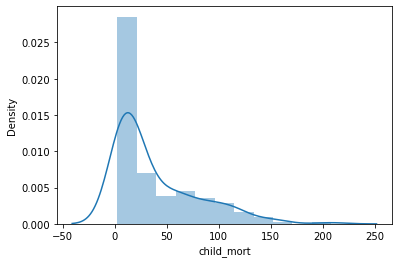

########################################################


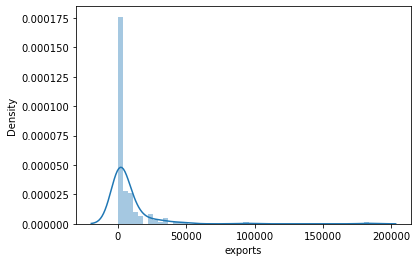

########################################################


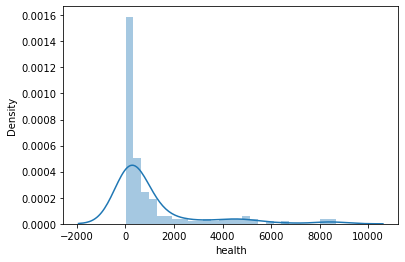

########################################################


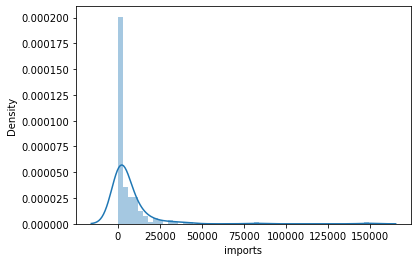

########################################################


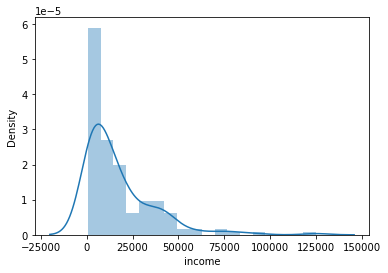

########################################################


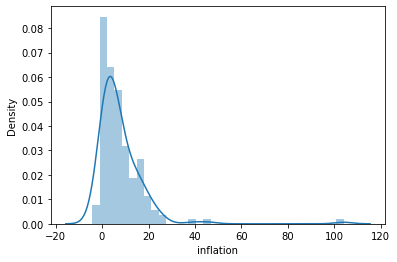

########################################################


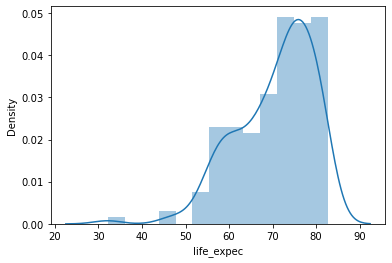

########################################################


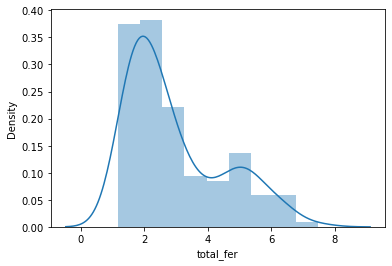

########################################################


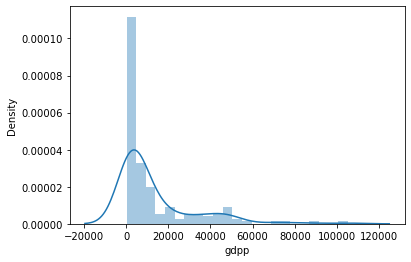

########################################################


In [112]:
col = list(countries_data.describe().columns)
for i in col:
    sns.distplot(countries_data[i])
    plt.show();
    print('########################################################')

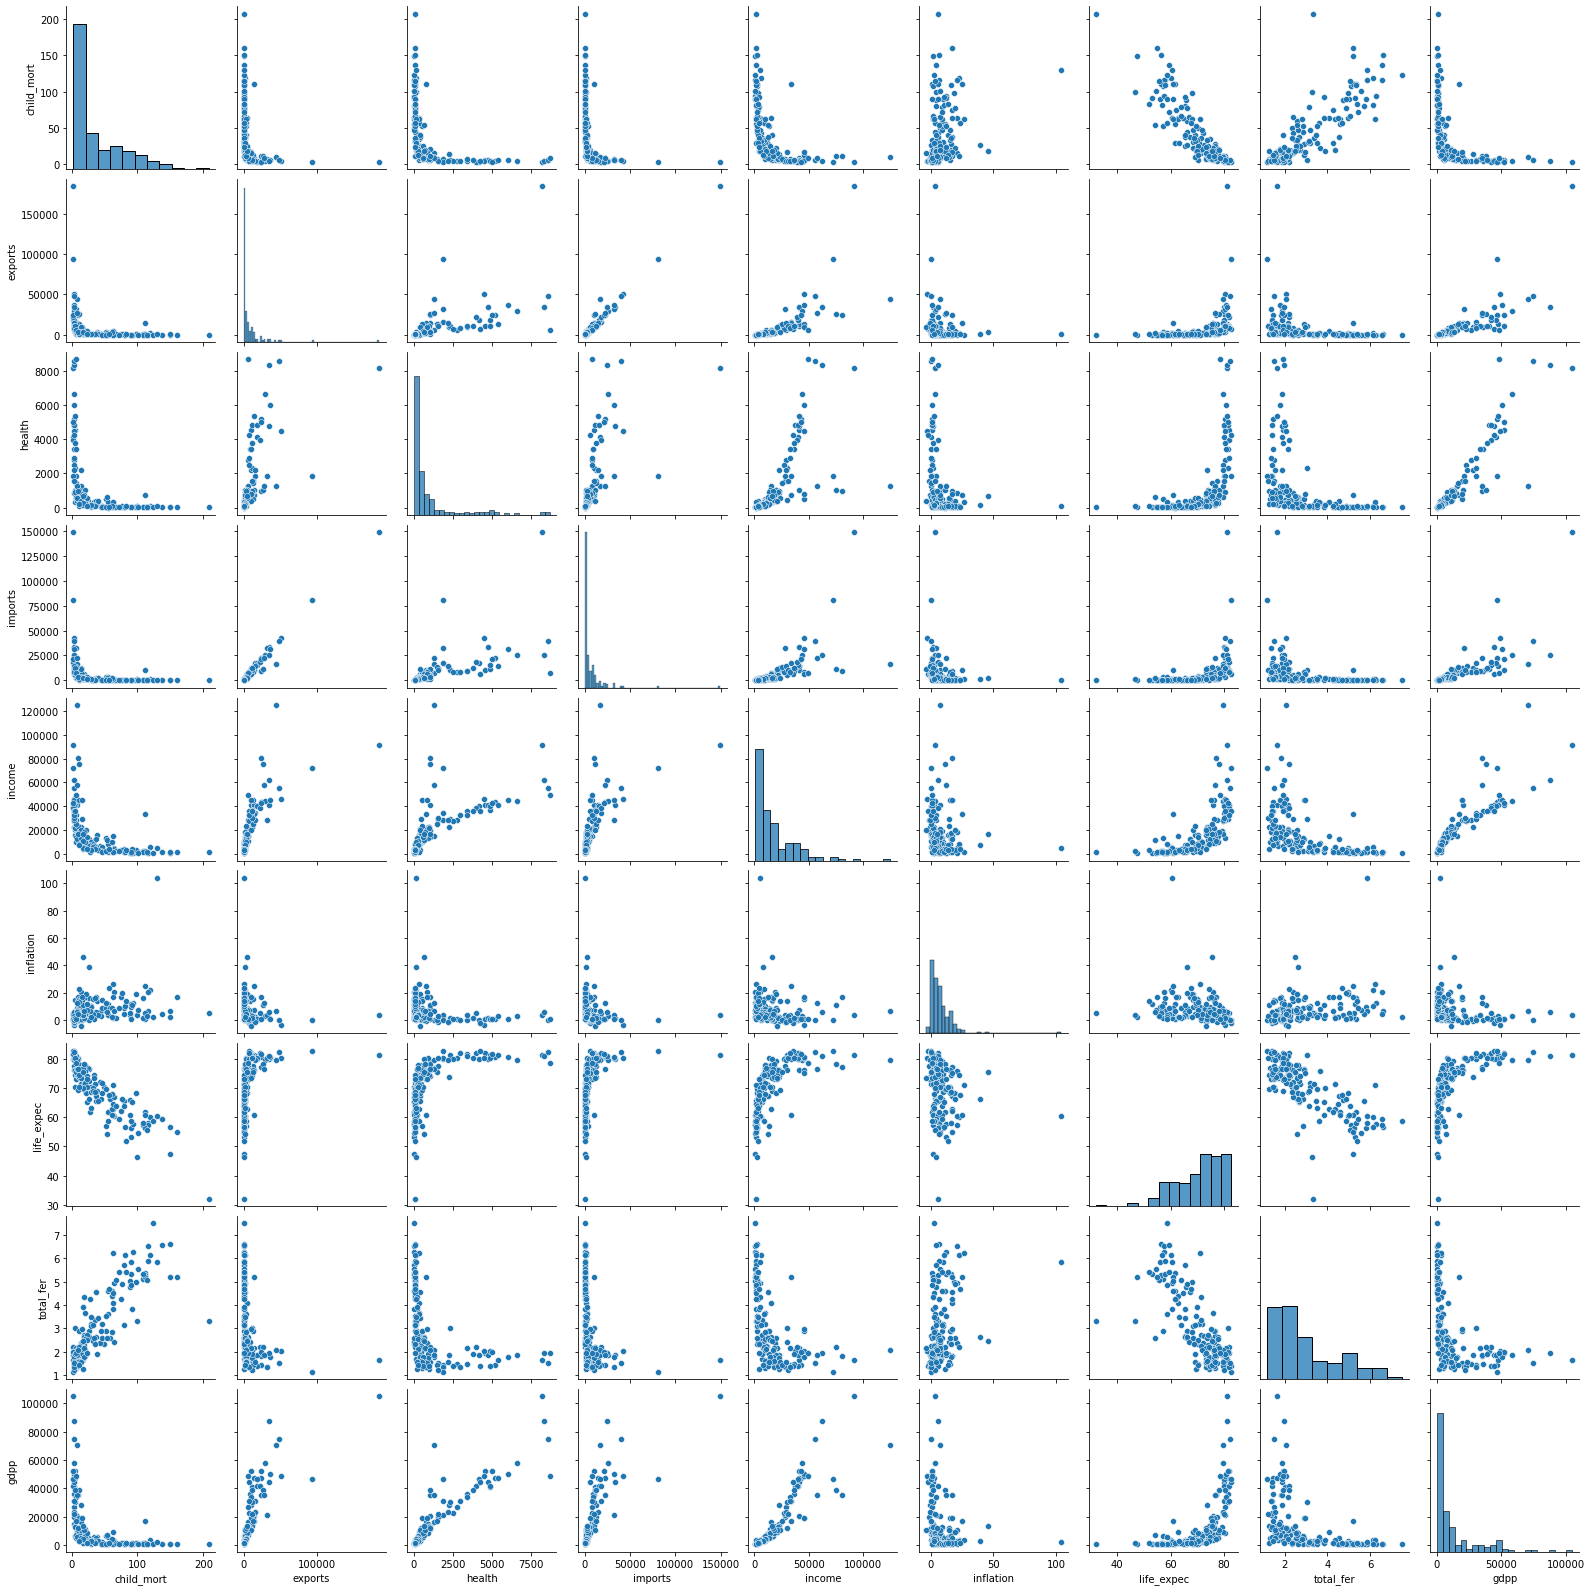

In [113]:
#extracting and visualizing numeric variables; all columns are already numeric so, extraction is not required
sns.pairplot(countries_data)

In [114]:
#correlation matrix
countries_data_cor = countries_data.corr()
countries_data_cor

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


<AxesSubplot:>

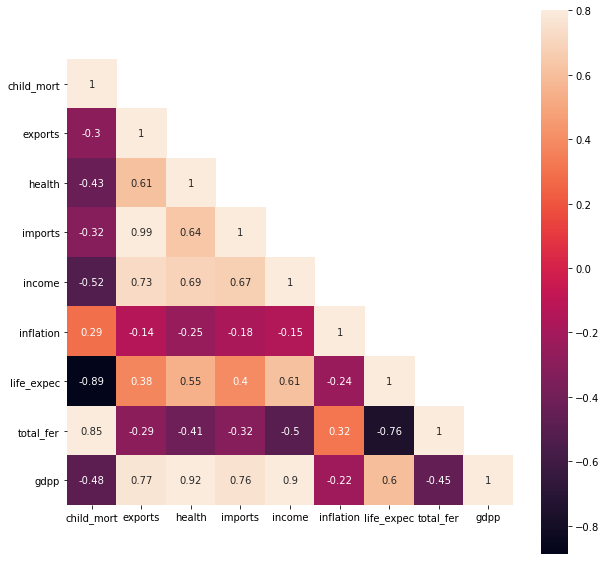

In [115]:
#using heatmap to better visualize the correlation between numeric variables; with masking redundant information
mask = np.array(countries_data_cor)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots()
fig.set_size_inches(10,10)    
sns.heatmap(countries_data_cor,annot = True, mask=mask, vmax = 0.8, square = True)

### III. Outlier Treatment

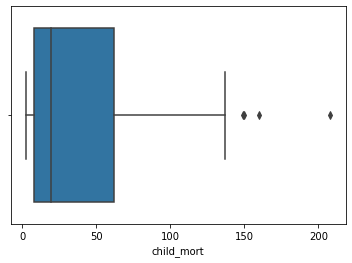

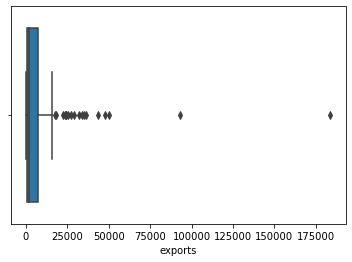

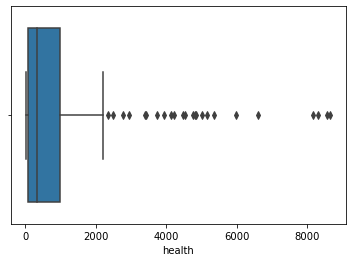

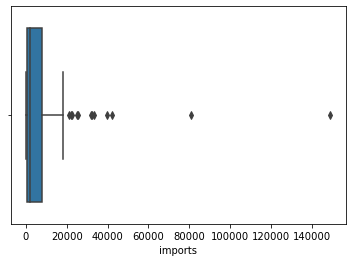

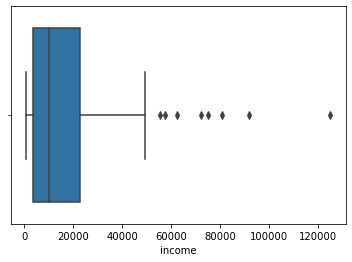

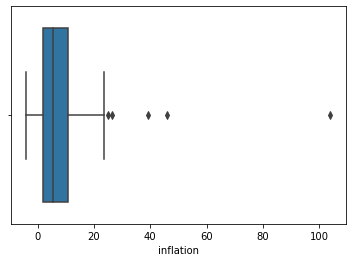

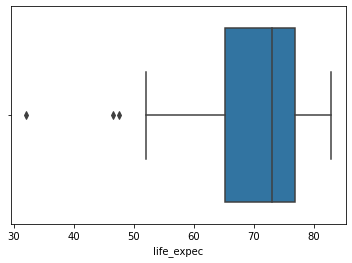

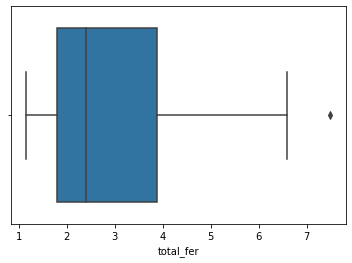

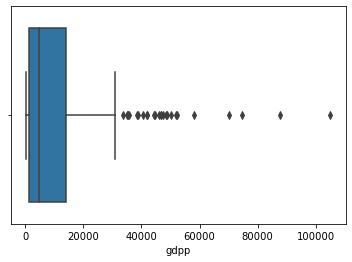

In [116]:
#outlier 
for c in col:
    sns.boxplot(countries_data[c])
    plt.show();

In [117]:
#outlier treatment for columns which affect our result the most using soft capping at 99 percentile
q2 = countries_data['gdpp'].quantile(0.99)
print(q2)
countries_data['gdpp'][countries_data['gdpp']>=q2] = q2

79088.00000000004


In [118]:
#income
q2 = countries_data['income'].quantile(0.99)
print(q2)
countries_data['income'][countries_data['income']>=q2] = q2

84374.00000000003


In [119]:
#exports
q2 = countries_data['exports'].quantile(0.99)
print(q2)
countries_data['exports'][countries_data['exports']>=q2] = q2

64794.26000000014


In [120]:
#health
q2 = countries_data['health'].quantile(0.99)
print(q2)
countries_data['health'][countries_data['health']>=q2] = q2

8410.3304


In [121]:
#health
q2 = countries_data['health'].quantile(0.99)
print(q2)
countries_data['health'][countries_data['health']>=q2] = q2

8352.982736000002


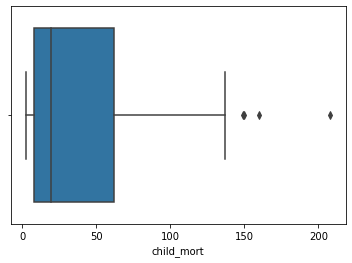

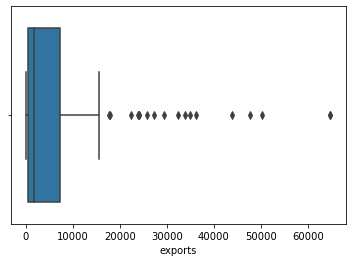

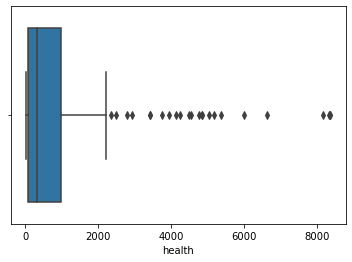

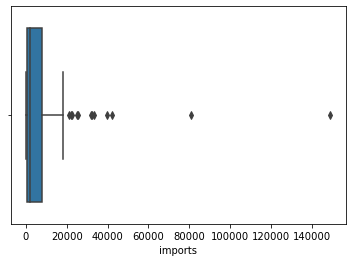

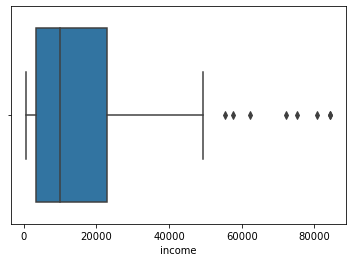

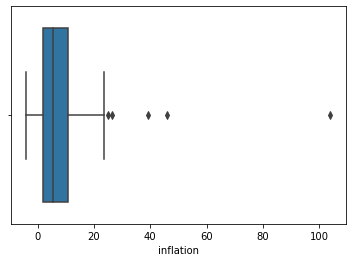

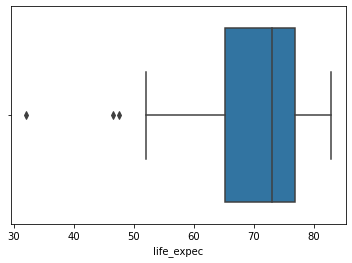

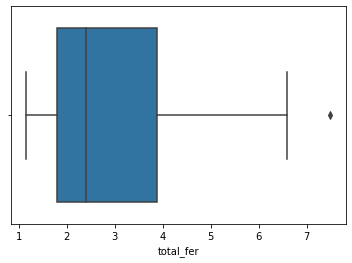

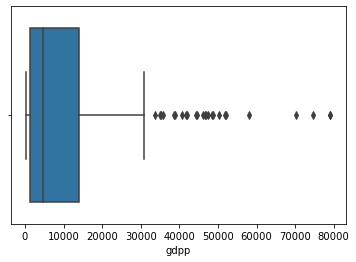

In [122]:
for c in col:
    sns.boxplot(countries_data[c])
    plt.show();

In [123]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [124]:
for i in range(20):
    print(hopkins(countries_data))

0.9263602126093191
0.9306132398091902
0.949328590888398
0.950392595037022
0.9519444737574084
0.9677650861531449
0.9622086441895558
0.9530367244204624
0.9322830278886796
0.9633288502431063
0.9413789748779995
0.9577361055383776
0.9437453660151407
0.9122142404410982
0.9740821759246684
0.9547139967405808
0.9393571020956675
0.9453927888169874
0.9660849962976463
0.9791439878146647


### IV. Scaling

In [148]:
#scaling and dropping the categorical variable
ss = StandardScaler()
countries_data_sca = ss.fit_transform(countries_data)
countries_data_sca

array([[ 1.29153238, -0.56962212, -0.56746969, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.47385792, -0.44070503, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.42399973, -0.48665504, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54071936, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55291802, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54274443, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [151]:
countries_data_sca = pd.DataFrame(countries_data_sca)
countries_data_sca.columns = col
countries_data_sca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.567470,-0.432276,-0.851668,0.157336,-1.619092,1.902882,-0.702259
1,-0.538949,-0.473858,-0.440705,-0.313677,-0.386946,-0.312347,0.647866,-0.859973,-0.498726
2,-0.272833,-0.424000,-0.486655,-0.353720,-0.221053,0.789274,0.670423,-0.038404,-0.477434
3,2.007808,-0.381249,-0.534548,-0.345953,-0.612045,1.387054,-1.179234,2.128151,-0.530950
4,-0.695634,-0.086742,-0.178307,0.040735,0.125254,-0.601749,0.704258,-0.541946,-0.032042


### V. Best value of k: SSD, Silhoutte Score

In [152]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(countries_data_sca)
    ss.append([k, silhouette_score(countries_data_sca, kmean.labels_)])
    
ss

[[2, 0.4705813509186062],
 [3, 0.4223784750651262],
 [4, 0.4266467618492745],
 [5, 0.4086467215560979],
 [6, 0.40187772677964434],
 [7, 0.3090653096371952],
 [8, 0.29523202683958927],
 [9, 0.32051768042467615],
 [10, 0.27664409383276967]]

In [153]:
sil = pd.DataFrame(ss)
sil

,0,1
0,2,0.470581
1,3,0.422378
2,4,0.426647
3,5,0.408647
4,6,0.401878
5,7,0.309065
6,8,0.295232
7,9,0.320518
8,10,0.276644


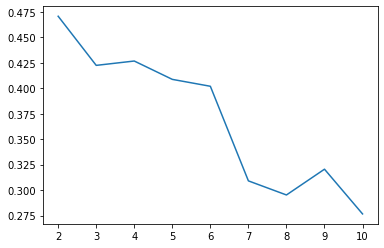

In [154]:
plt.plot(sil[0], sil[1]);


In [155]:
#after 2, 5 is the highest value so 5 is chosen

In [156]:
# SSD: Elbow

ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(countries_data_sca)
    ssd.append([k, kmean.inertia_])
ssd

[[2, 890.3955365935128],
 [3, 599.6079104407684],
 [4, 483.6829624932816],
 [5, 408.6453223160747],
 [6, 342.3954202449514],
 [7, 305.31563351501035],
 [8, 273.8254836048561],
 [9, 247.5941881253085],
 [10, 221.29293102678832]]

In [157]:
ssd = pd.DataFrame(ssd)
ssd

,0,1
0,2,890.395537
1,3,599.607910
2,4,483.682962
3,5,408.645322
4,6,342.395420
5,7,305.315634
6,8,273.825484
7,9,247.594188
8,10,221.292931


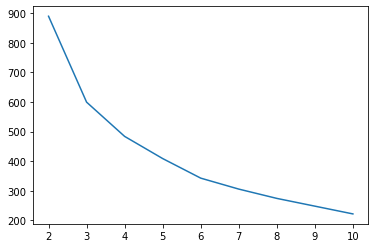

In [158]:
plt.plot(ssd[0],ssd[1]); 

### VI.  Using the final value of k, perform final KMeans Analysis k==4

In [159]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(countries_data_sca)

KMeans(n_clusters=4, random_state=0)

In [160]:
kmeans.cluster_centers_

array([[-0.43155282, -0.27865866, -0.32009678, -0.21319838, -0.19002126,
        -0.04618906,  0.30079929, -0.46763474, -0.3121307 ],
       [-0.8253904 ,  1.31559414,  1.69014548,  0.78692193,  1.5383619 ,
        -0.46912792,  1.11066975, -0.75145085,  1.78156867],
       [ 1.32661038, -0.49724204, -0.52657317, -0.39281661, -0.72390519,
         0.39181237, -1.27627565,  1.3543418 , -0.62421756],
       [-0.88216414,  5.11867474,  2.21490483,  7.39795921,  3.42841261,
        -0.56882323,  1.29073525, -1.03223716,  2.88222662]])

In [161]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 3, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 3, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2], dtype=int32)

In [179]:
countries_data_sca['labels'] = kmeans.labels_
countries_data['labels'] = kmeans.labels_

In [180]:
countries_data_sca['labels'].value_counts()


0    88
2    48
1    29
3     2
Name: labels, dtype: int64

In [181]:
countries_data_sca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,1.291532,-0.569622,-0.567470,-0.432276,-0.851668,0.157336,-1.619092,1.902882,-0.702259,2
1,-0.538949,-0.473858,-0.440705,-0.313677,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,0
2,-0.272833,-0.424000,-0.486655,-0.353720,-0.221053,0.789274,0.670423,-0.038404,-0.477434,0
3,2.007808,-0.381249,-0.534548,-0.345953,-0.612045,1.387054,-1.179234,2.128151,-0.530950,2
4,-0.695634,-0.086742,-0.178307,0.040735,0.125254,-0.601749,0.704258,-0.541946,-0.032042,0


### VII. Visualize the cluster using a scatter plots


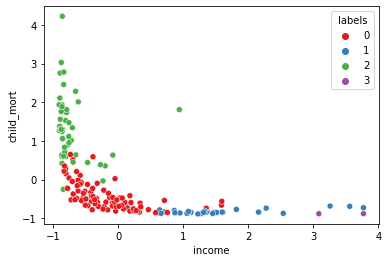

In [182]:
sns.scatterplot(x='income', y='child_mort', hue='labels', data=countries_data_sca, palette='Set1');

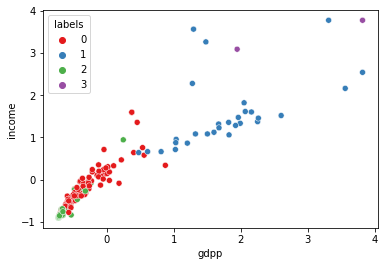

In [183]:
sns.scatterplot(x='gdpp', y='income', hue='labels', data=countries_data_sca, palette='Set1');

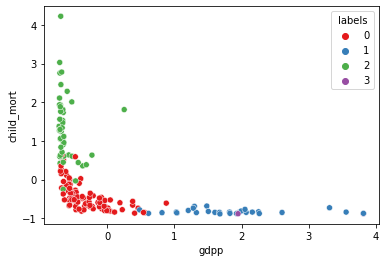

In [184]:
sns.scatterplot(x='gdpp', y='child_mort', hue='labels', data=countries_data_sca, palette='Set1');

In [185]:
countries_data_sca[['gdpp','child_mort','income','labels']].groupby('labels').mean()

,gdpp,child_mort,income
labels,,,
0,-0.312131,-0.431553,-0.190021
1,1.781569,-0.825390,1.538362
2,-0.624218,1.326610,-0.723905
3,2.882227,-0.882164,3.428413


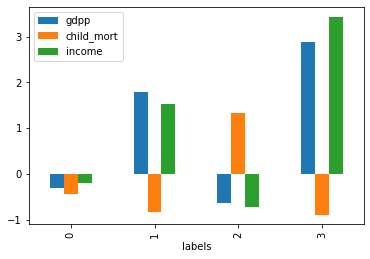

In [186]:
countries_data_sca[['gdpp','child_mort','income','labels']].groupby('labels').mean().plot(kind='bar');

In [187]:
c1 = countries_data[countries_data['labels']==2]

In [190]:
c1.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
country,,,,,,,,,,
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,2
Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,2
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,2
Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,2
Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,2


### VI.  Using the final value of k, perform final KMeans Analysis k==5

In [191]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(countries_data_sca)

KMeans(n_clusters=5, random_state=0)

In [192]:
kmeans.cluster_centers_

kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1,
       0, 3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 0,
       3, 0, 0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0,
       1, 0, 3, 0, 0, 0, 1, 3, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       3, 3, 1, 4, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 3, 1, 1, 0, 3, 0, 0, 1, 0, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 3, 3, 3, 0, 0, 0, 0, 0, 1, 1], dtype=int32)

In [193]:
countries_data_sca['labels'] = kmeans.labels_
countries_data['labels'] = kmeans.labels_

countries_data_sca['labels'].value_counts()


countries_data_sca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
0,1.291532,-0.569622,-0.567470,-0.432276,-0.851668,0.157336,-1.619092,1.902882,-0.702259,1
1,-0.538949,-0.473858,-0.440705,-0.313677,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,0
2,-0.272833,-0.424000,-0.486655,-0.353720,-0.221053,0.789274,0.670423,-0.038404,-0.477434,0
3,2.007808,-0.381249,-0.534548,-0.345953,-0.612045,1.387054,-1.179234,2.128151,-0.530950,1
4,-0.695634,-0.086742,-0.178307,0.040735,0.125254,-0.601749,0.704258,-0.541946,-0.032042,0


### VII. Visualize the cluster using a scatter plots

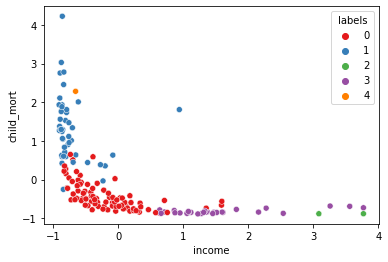

In [194]:
sns.scatterplot(x='income', y='child_mort', hue='labels', data=countries_data_sca, palette='Set1');

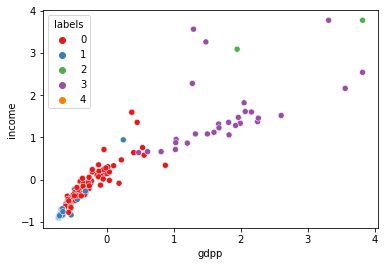

In [195]:
sns.scatterplot(x='gdpp', y='income', hue='labels', data=countries_data_sca, palette='Set1');

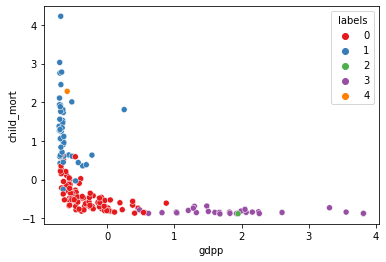

In [196]:
sns.scatterplot(x='gdpp', y='child_mort', hue='labels', data=countries_data_sca, palette='Set1');

In [197]:
countries_data_sca[['gdpp','child_mort','income','labels']].groupby('labels').mean()

,gdpp,child_mort,income
labels,,,
0,-0.312131,-0.431553,-0.190021
1,-0.624733,1.306296,-0.725394
2,2.882227,-0.882164,3.428413
3,1.781569,-0.825390,1.538362
4,-0.600003,2.281385,-0.653937


In [198]:
countries_data_sca[['gdpp','child_mort','income','labels']].groupby('labels').mean()

,gdpp,child_mort,income
labels,,,
0,-0.312131,-0.431553,-0.190021
1,-0.624733,1.306296,-0.725394
2,2.882227,-0.882164,3.428413
3,1.781569,-0.825390,1.538362
4,-0.600003,2.281385,-0.653937


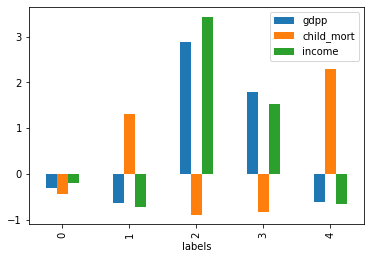

In [199]:
countries_data_sca[['gdpp','child_mort','income','labels']].groupby('labels').mean().plot(kind='bar');

As we can see that the label 3 though it doesn't have the lowest gdp and income it has by scale the highest child mortality rate but as we. can see from the visual representation it has only one country and we need atleast 5 we will choose label 1.

In [205]:
c1 = countries_data[countries_data['labels']==1]

In [206]:
c1.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
country,,,,,,,,,,
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,1
Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,1
Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1
Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,1


As we can see for both cases the 5 countries match and therefore these are the countries in direst need.

### VIII. Hierarchical Clustering

In [208]:
countries_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


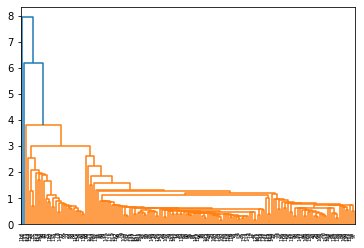

In [217]:
mergings = linkage(countries_data_sca, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

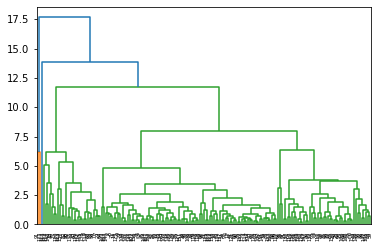

In [218]:
# complete linkage
mergings = linkage(countries_data_sca, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [225]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=5).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 3, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 4, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 3, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [232]:
# assign cluster labels
countries_data_sca['cluster_labels'] = cluster_labels
countries_data['cluster_labels'] = cluster_labels


countries_data_sca.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels,cluster_labels
0,1.291532,-0.569622,-0.567470,-0.432276,-0.851668,0.157336,-1.619092,1.902882,-0.702259,1,0
1,-0.538949,-0.473858,-0.440705,-0.313677,-0.386946,-0.312347,0.647866,-0.859973,-0.498726,0,1
2,-0.272833,-0.424000,-0.486655,-0.353720,-0.221053,0.789274,0.670423,-0.038404,-0.477434,0,1
3,2.007808,-0.381249,-0.534548,-0.345953,-0.612045,1.387054,-1.179234,2.128151,-0.530950,1,0
4,-0.695634,-0.086742,-0.178307,0.040735,0.125254,-0.601749,0.704258,-0.541946,-0.032042,0,1


<AxesSubplot:xlabel='cluster_labels', ylabel='child_mort'>

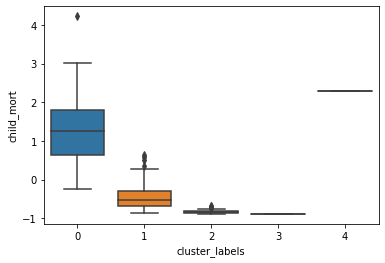

In [233]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=countries_data_sca)

<AxesSubplot:xlabel='cluster_labels', ylabel='income'>

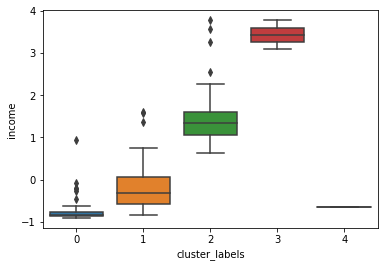

In [234]:
sns.boxplot(x='cluster_labels', y='income', data=countries_data_sca)

<AxesSubplot:xlabel='cluster_labels', ylabel='gdpp'>

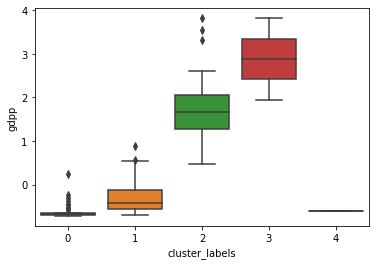

In [235]:
sns.boxplot(x='cluster_labels', y='gdpp', data=countries_data_sca)

In [240]:
c2 = countries_data[countries_data['cluster_labels']==0]

In [241]:
c1.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
country,,,,,,,,,,
Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.26,231.0,1
Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1
"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.54,334.0,1
Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1
Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.20,399.0,1
